In [1]:
import torch
import torch.nn.functional as F
import pytorch_lightning as pl
import os
import math
import torch.nn as nn
from model import rnn
import matplotlib.pyplot as plt
from matplotlib import colormaps
from dataset import MnistDataModule
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import Normalize
import default_config as config
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import Callback
from pytorch_lightning.profilers import PyTorchProfiler

torch.set_float32_matmul_precision("medium")

In [58]:
model_name = "psMNIST_256_0.05_0.01_0.1_lr_0.01_sigma_seed_76"
# model_name = "psMNIST_256_0.05_0.01_0.1_lr_0.01_sigma"
# model_name = "psMNIST_128_0.05_0.01_0.1_lr_0.01_sigma"
# model_name = "sMNIST_256_0.05_0.01_0.1_lr_0.01_sigma"
PERMUTED = True
folder_name = "tb_logs"
version = 0
seed = 76

In [59]:
def load_model(epoch_number=None, model_name=None, folder_name=None, version=0):
    checkpoint_folder = f'{folder_name}/{model_name}/version_{version}/checkpoints/'
    hparams_path = f'{folder_name}/{model_name}/version_{version}/hparams.yaml'
    checkpoint_files = os.listdir(checkpoint_folder)
    epoch_idx = [int(file.split('epoch=')[1].split('-')[0]) for file in checkpoint_files]

    if epoch_number is not None:
        # If epoch number is provided, find the index of that epoch
        max_idx = epoch_idx.index(epoch_number)
    else:
        # If epoch number is not provided, find the index of the max epoch
        max_idx = epoch_idx.index(max(epoch_idx))

    checkpoint_path = os.path.join(checkpoint_folder, checkpoint_files[max_idx])
    # print(checkpoint_path)
    model = rnn.load_from_checkpoint(checkpoint_path=checkpoint_path, map_location='cpu', hparams_file=hparams_path)
    model.eval()
    return model


# model = load_model()

# epoch_no = 100
# model = load_model(epoch_no)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9028000235557556
         test_f1            0.9028000235557556
        test_loss           0.3217766582965851
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9044999480247498
         test_f1            0.9044999480247498
        test_loss           0.31858301162719727
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9050999879837036
         test_f1            0.9050999879837036
        test_loss           0.3139788508415222
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8999999761581421
         test_f1            0.8999999761581421
        test_loss           0.3305025100708008
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9048999547958374
         test_f1            0.9048999547958374
        test_loss           0.31739741563796997
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9048999547958374
         test_f1            0.9048999547958374
        test_loss           0.31146156787872314
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9003999829292297
         test_f1            0.9003999829292297
        test_loss           0.32283374667167664
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8998000025749207
         test_f1            0.8998000025749207
        test_loss           0.3235490024089813
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.902999997138977
         test_f1             0.902999997138977
        test_loss           0.3273787498474121
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8962000012397766
         test_f1            0.8962000012397766
        test_loss           0.34535035490989685
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.904699981212616
         test_f1             0.904699981212616
        test_loss           0.31828054785728455
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9048999547958374
         test_f1            0.9048999547958374
        test_loss           0.3296032249927521
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9121999740600586
         test_f1            0.9121999740600586
        test_loss            0.304647833108902
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9059999585151672
         test_f1            0.9059999585151672
        test_loss           0.3182550072669983
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9092999696731567
         test_f1            0.9092999696731567
        test_loss           0.30864793062210083
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9066999554634094
         test_f1            0.9066999554634094
        test_loss           0.33665239810943604
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9043999910354614
         test_f1            0.9043999910354614
        test_loss           0.34342554211616516
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9096999764442444
         test_f1            0.9096999764442444
        test_loss           0.31036508083343506
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9106999635696411
         test_f1            0.9106999635696411
        test_loss           0.3089393377304077
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9098999500274658
         test_f1            0.9098999500274658
        test_loss           0.3180357813835144
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9104999899864197
         test_f1            0.9104999899864197
        test_loss           0.31252217292785645
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9079999923706055
         test_f1            0.9079999923706055
        test_loss           0.33386144042015076
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9081999659538269
         test_f1            0.9081999659538269
        test_loss           0.31899699568748474
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9098999500274658
         test_f1            0.9098999500274658
        test_loss           0.32176193594932556
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9072999954223633
         test_f1            0.9072999954223633
        test_loss           0.31715571880340576
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9107999801635742
         test_f1            0.9107999801635742
        test_loss           0.31153687834739685
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9055999517440796
         test_f1            0.9055999517440796
        test_loss           0.3379177749156952
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9070000052452087
         test_f1            0.9070000052452087
        test_loss           0.3239692151546478
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9104999899864197
         test_f1            0.9104999899864197
        test_loss            0.327162504196167
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9088999629020691
         test_f1            0.9088999629020691
        test_loss           0.32817530632019043
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9078999757766724
         test_f1            0.9078999757766724
        test_loss           0.32463839650154114
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9134999513626099
         test_f1            0.9134999513626099
        test_loss           0.3221874535083771
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.913100004196167
         test_f1             0.913100004196167
        test_loss           0.3182433247566223
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9096999764442444
         test_f1            0.9096999764442444
        test_loss           0.3287195861339569
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9125999808311462
         test_f1            0.9125999808311462
        test_loss           0.32627639174461365
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.911899983882904
         test_f1             0.911899983882904
        test_loss           0.3174166977405548
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9093999862670898
         test_f1            0.9093999862670898
        test_loss           0.33847731351852417
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.905299961566925
         test_f1             0.905299961566925
        test_loss           0.3517184257507324
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9101999998092651
         test_f1            0.9101999998092651
        test_loss            0.327566534280777
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9071999788284302
         test_f1            0.9071999788284302
        test_loss           0.3425638973712921
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9138999581336975
         test_f1            0.9138999581336975
        test_loss           0.3353836238384247
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9122999906539917
         test_f1            0.9122999906539917
        test_loss           0.3599560856819153
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9106000065803528
         test_f1            0.9106000065803528
        test_loss           0.34726589918136597
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9142999649047852
         test_f1            0.9142999649047852
        test_loss           0.3359186053276062
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.905299961566925
         test_f1             0.905299961566925
        test_loss           0.3662191331386566
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9103999733924866
         test_f1            0.9103999733924866
        test_loss            0.357668399810791
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9121999740600586
         test_f1            0.9121999740600586
        test_loss           0.3573635518550873
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.909500002861023
         test_f1             0.909500002861023
        test_loss           0.37328073382377625
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9110999703407288
         test_f1            0.9110999703407288
        test_loss           0.3507055938243866
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9116999506950378
         test_f1            0.9116999506950378
        test_loss           0.3662364184856415
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9138999581336975
         test_f1            0.9138999581336975
        test_loss           0.3438452184200287
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9091999530792236
         test_f1            0.9091999530792236
        test_loss           0.36495649814605713
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9091999530792236
         test_f1            0.9091999530792236
        test_loss           0.3649340271949768
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9054999947547913
         test_f1            0.9054999947547913
        test_loss           0.3760280907154083
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9072999954223633
         test_f1            0.9072999954223633
        test_loss           0.3764852285385132
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9079999923706055
         test_f1            0.9079999923706055
        test_loss           0.3743685781955719
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9075999855995178
         test_f1            0.9075999855995178
        test_loss           0.3897283971309662
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9125999808311462
         test_f1            0.9125999808311462
        test_loss           0.3752608597278595
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9104999899864197
         test_f1            0.9104999899864197
        test_loss           0.4067634046077728
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9108999967575073
         test_f1            0.9108999967575073
        test_loss           0.3769401013851166
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9110999703407288
         test_f1            0.9110999703407288
        test_loss           0.37805676460266113
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9115999937057495
         test_f1            0.9115999937057495
        test_loss           0.3871229887008667
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9104999899864197
         test_f1            0.9104999899864197
        test_loss           0.38729143142700195
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9106000065803528
         test_f1            0.9106000065803528
        test_loss           0.39537253975868225
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9092999696731567
         test_f1            0.9092999696731567
        test_loss           0.3997085988521576
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9078999757766724
         test_f1            0.9078999757766724
        test_loss           0.41002002358436584
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9083999991416931
         test_f1            0.9083999991416931
        test_loss            0.400890588760376
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9090999960899353
         test_f1            0.9090999960899353
        test_loss           0.4033358097076416
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9092999696731567
         test_f1            0.9092999696731567
        test_loss           0.40688493847846985
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9084999561309814
         test_f1            0.9084999561309814
        test_loss           0.4080429673194885
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9115999937057495
         test_f1            0.9115999937057495
        test_loss           0.4050082564353943
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9101999998092651
         test_f1            0.9101999998092651
        test_loss           0.4156268537044525
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9079999923706055
         test_f1            0.9079999923706055
        test_loss           0.4351484775543213
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9116999506950378
         test_f1            0.9116999506950378
        test_loss           0.42360755801200867
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9072999954223633
         test_f1            0.9072999954223633
        test_loss           0.4402998387813568
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9097999930381775
         test_f1            0.9097999930381775
        test_loss           0.4421130120754242
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9096999764442444
         test_f1            0.9096999764442444
        test_loss           0.4354608654975891
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9092999696731567
         test_f1            0.9092999696731567
        test_loss           0.43148669600486755
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9115999937057495
         test_f1            0.9115999937057495
        test_loss           0.42135927081108093
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9093999862670898
         test_f1            0.9093999862670898
        test_loss           0.4369088411331177
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9097999930381775
         test_f1            0.9097999930381775
        test_loss           0.43148982524871826
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9088999629020691
         test_f1            0.9088999629020691
        test_loss           0.4523122310638428
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9115999937057495
         test_f1            0.9115999937057495
        test_loss           0.4393289089202881
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9106000065803528
         test_f1            0.9106000065803528
        test_loss           0.43402615189552307
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9098999500274658
         test_f1            0.9098999500274658
        test_loss           0.44089773297309875
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9108999967575073
         test_f1            0.9108999967575073
        test_loss           0.4525458514690399
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9099999666213989
         test_f1            0.9099999666213989
        test_loss           0.4622623026371002
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9104999899864197
         test_f1            0.9104999899864197
        test_loss           0.47043222188949585
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9090999960899353
         test_f1            0.9090999960899353
        test_loss           0.4738921821117401
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9097999930381775
         test_f1            0.9097999930381775
        test_loss           0.48366111516952515
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9056999683380127
         test_f1            0.9056999683380127
        test_loss            0.503288745880127
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9084999561309814
         test_f1            0.9084999561309814
        test_loss           0.4978773295879364
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9086999893188477
         test_f1            0.9086999893188477
        test_loss           0.4991794228553772
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.910099983215332
         test_f1             0.910099983215332
        test_loss           0.4963960349559784
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


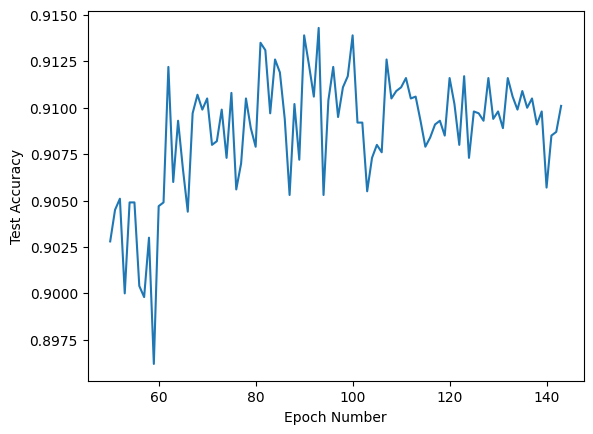

In [60]:
class TestAccuracyCallback(Callback):
    def __init__(self):
        super().__init__()
        self.test_acc = None

    def on_test_end(self, trainer, pl_module):
        metrics = trainer.callback_metrics
        self.test_acc = metrics.get('test_acc', None)

test_acc_callback = TestAccuracyCallback()
# check the test accuracy for models with epoch numbers between 90 and 130
logger = TensorBoardLogger(folder_name, name="Inference")
dm = MnistDataModule(
    data_dir=config.DATA_DIR,
    batch_size=10000,
    num_workers=2,
    permuted=PERMUTED,
    seed=seed
)
trainer = pl.Trainer(
    logger=logger,
    max_epochs=1,
    callbacks=[test_acc_callback]
)
epochs = list(range(50, 144))
test_accuracies = []
for epoch_no in epochs:
    model = load_model(epoch_no, model_name, folder_name, version)
    trainer.test(model, datamodule=dm)
    test_accuracies.append(test_acc_callback.test_acc)

# plot the test accuracy vs epoch number
# bring test_accuracies to cpu
test_accuracies = [acc.cpu().numpy() for acc in test_accuracies]
plt.plot(epochs, test_accuracies)
plt.xlabel('Epoch Number')
plt.ylabel('Test Accuracy')
plt.show()

In [61]:
# print the epoch number corresponding to the best accuracy
max_acc = max(test_accuracies)
max_acc_epoch = epochs[test_accuracies.index(max_acc)]

print(f"Best accuracy: {max_acc} at epoch number: {max_acc_epoch}")

Best accuracy: 0.9142999649047852 at epoch number: 93


In [9]:
logger = TensorBoardLogger(folder_name, name="Inference")
dm = MnistDataModule(
    data_dir=config.DATA_DIR,
    batch_size=1000,
    num_workers=2,
    permuted=PERMUTED,
    seed=seed
)
# calculate training accuracy using pytorch lightning
trainer = pl.Trainer(
    logger=logger,
    max_epochs=1
)

epoch_no = None
model = load_model(epoch_no, model_name, folder_name, version)

trainer.test(model, datamodule=dm)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9747999906539917
         test_f1            0.9747999906539917
        test_loss           0.12274917960166931
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_acc': 0.9747999906539917,
  'test_f1': 0.9747999906539917,
  'test_loss': 0.12274917960166931}]

['hp_metric', 'test_acc', 'test_f1', 'test_loss', 'epoch']


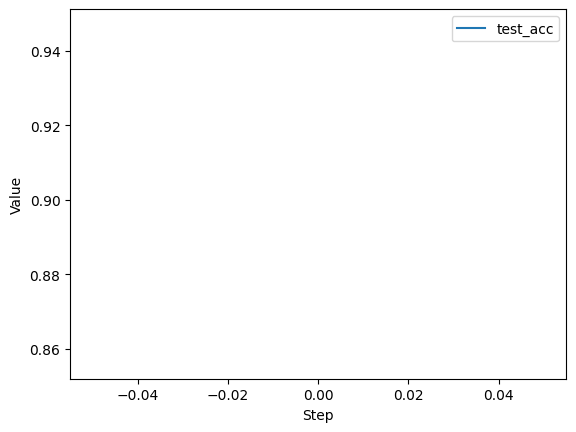

In [23]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

event_acc = EventAccumulator(logger.log_dir)
event_acc.Reload()

tags = event_acc.Tags()['scalars']
print(tags)
selected_tag = 'test_acc'
data = event_acc.Scalars(selected_tag)

# Extract steps and values
steps = [entry.step for entry in data]
values = [entry.value for entry in data]

# Plot the data using matplotlib
plt.plot(steps, values, label=selected_tag)
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.show()

In [24]:
# plot the evolution of activations
y_example = torch.stack(model.activations["y"], dim=1).cpu()
a_example = torch.stack(model.activations["a"], dim=1).cpu()
b0_example = torch.stack(model.activations["b0"], dim=1).cpu()
b1_example = torch.stack(model.activations["b1"], dim=1).cpu()
print(a_example.shape)

torch.Size([1000, 785, 128])


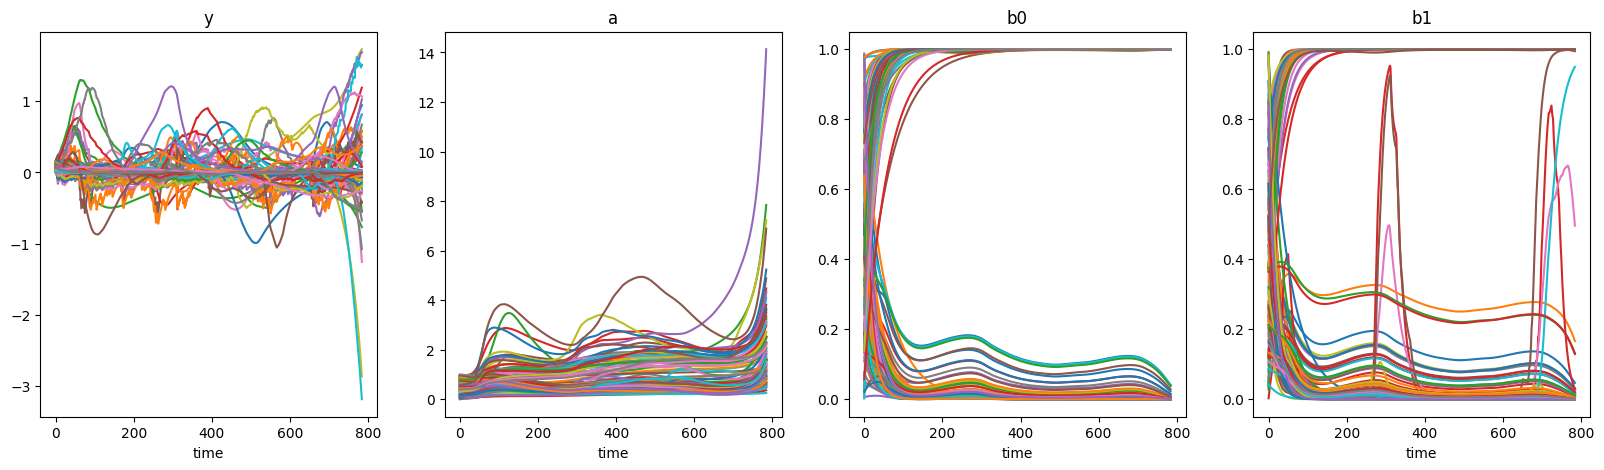

In [25]:
# plot y_example[0, :, :] and a_example[0, :, :] side by side
fig, axs = plt.subplots(1, 4)
# increase the figsze
batch_idx = 98
fig.set_size_inches(20, 5)
axs[0].plot(y_example[batch_idx, :, :])
axs[0].set_title('y')
axs[0].set_xlabel('time')

axs[1].plot(a_example[batch_idx, :, :])
axs[1].set_title('a')
axs[1].set_xlabel('time')

axs[2].plot(b0_example[batch_idx, :, :])
axs[2].set_title('b0')
axs[2].set_xlabel('time')

axs[3].plot(b1_example[batch_idx, :, :])
axs[3].set_title('b1')
axs[3].set_xlabel('time')
plt.show()

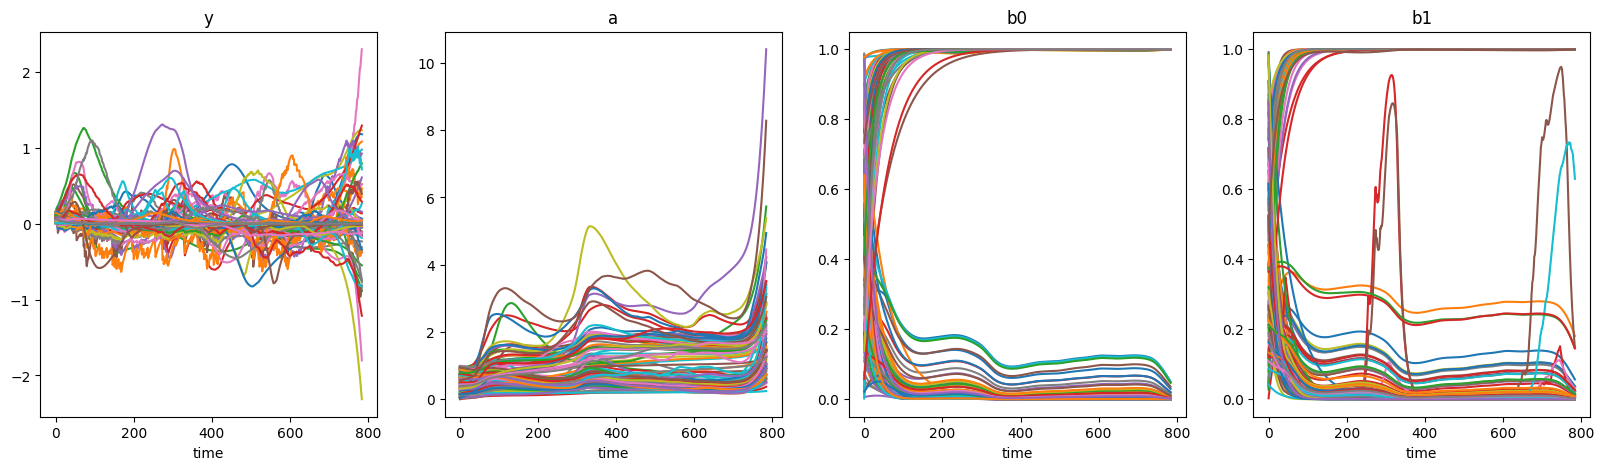

In [26]:
# plot y_example[0, :, :] and a_example[0, :, :] side by side
fig, axs = plt.subplots(1, 4)
# increase the figsze
batch_idx = 90
fig.set_size_inches(20, 5)
axs[0].plot(y_example[batch_idx, :, :])
axs[0].set_title('y')
axs[0].set_xlabel('time')

axs[1].plot(a_example[batch_idx, :, :])
axs[1].set_title('a')
axs[1].set_xlabel('time')

axs[2].plot(b0_example[batch_idx, :, :])
axs[2].set_title('b0')
axs[2].set_xlabel('time')

axs[3].plot(b1_example[batch_idx, :, :])
axs[3].set_title('b1')
axs[3].set_xlabel('time')
plt.show()

In [10]:
t = 400
# find indices of b0_example where the value is less than 0.6 at t timestep
indices = torch.where(b0_example[batch_idx, t, :] < 0.5)
print(indices)

(tensor([  0,   2,   3,   6,  10,  11,  12,  13,  16,  17,  18,  19,  22,  24,
         26,  30,  32,  33,  34,  35,  36,  39,  41,  42,  43,  45,  46,  50,
         51,  53,  54,  55,  56,  57,  58,  61,  62,  64,  65,  67,  69,  71,
         72,  73,  75,  76,  77,  79,  80,  83,  85,  86,  87,  90,  91,  96,
         98,  99, 100, 103, 106, 107, 108, 109, 110, 113, 114, 115, 117, 121,
        122, 123, 125, 126, 127]),)


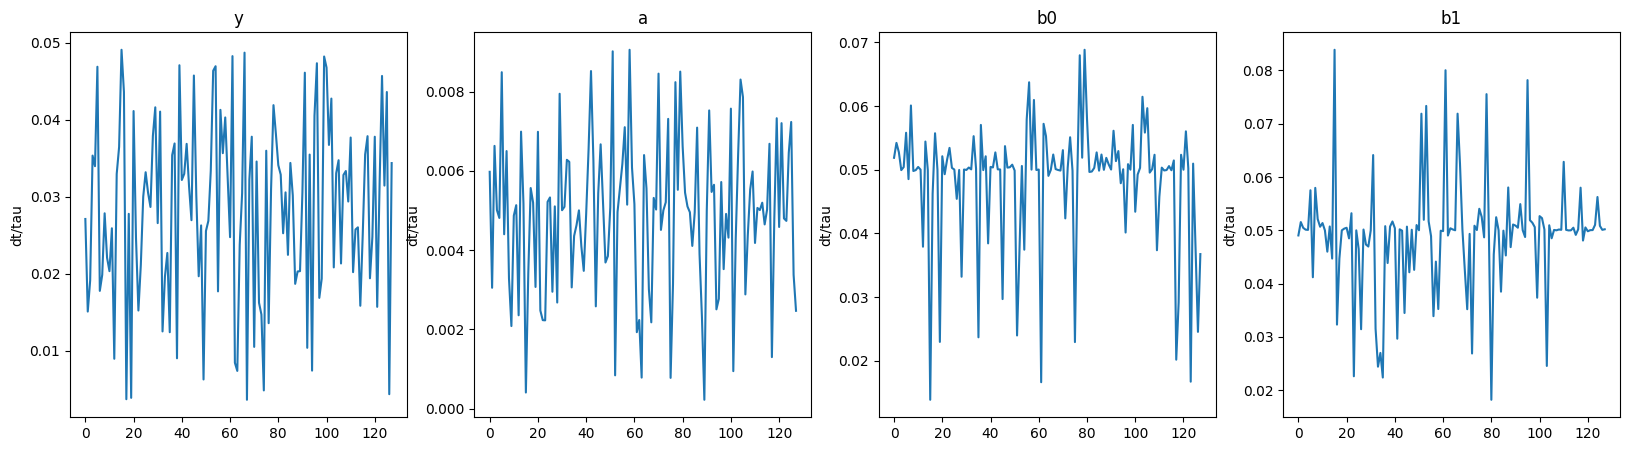

In [27]:
fig, axs = plt.subplots(1, 4)
# increase the figsze
batch_idx = 10
fig.set_size_inches(20, 5)
axs[0].plot(model.org.dt_tauy().detach())
axs[0].set_title('y')
axs[0].set_ylabel('dt/tau')

axs[1].plot(model.org.dt_taua().detach())
axs[1].set_title('a')
axs[1].set_ylabel('dt/tau')

axs[2].plot(model.org.dt_taub0().detach())
axs[2].set_title('b0')
axs[2].set_ylabel('dt/tau')

axs[3].plot(model.org.dt_taub1().detach())
axs[3].set_title('b1')
axs[3].set_ylabel('dt/tau')
plt.show()


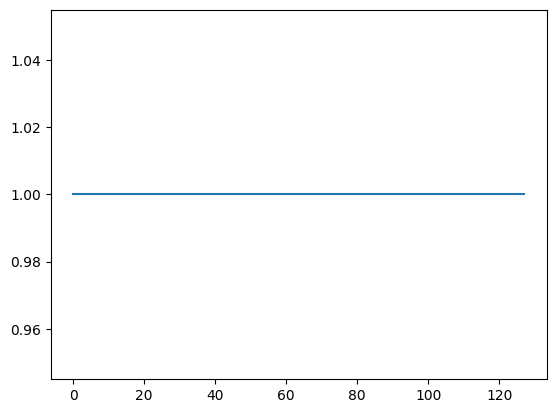

In [28]:
sigma = model.org.sigma.detach()
# plot it
plt.plot(abs(sigma))
# plot indices
plt.show()

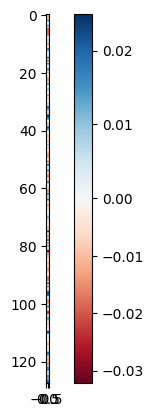

In [29]:
Wa = model.org.Wbx0.detach()
norm = TwoSlopeNorm(vmin=torch.min(Wa), vcenter=0.0, vmax=torch.max(Wa))
cmap = colormaps.get_cmap('RdBu')
# plot it
plt.imshow(Wa, cmap=cmap, norm=norm)
plt.colorbar()

We now analyze the dynamics of a and why they grow so much towards the end

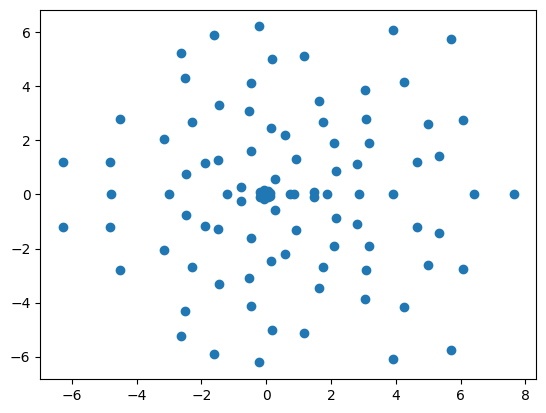

In [30]:
Wr = model.org.Wr().detach().cpu()

# calculate eigenvalues of Way
eigvals = torch.linalg.eigvals(Wr)
# plot the real and complex parts of the eigenvalues
plt.scatter(eigvals.real, eigvals.imag)
# xlim 0, 1
# plt.xlim(0, 5)
plt.show()

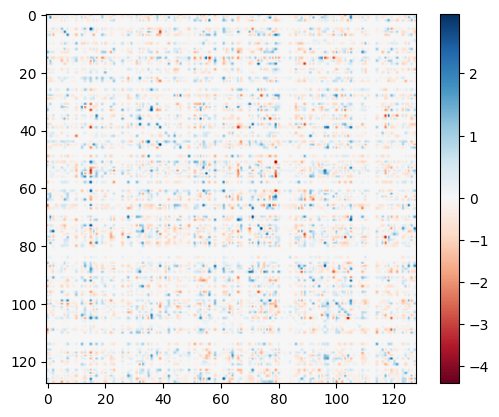

In [31]:
# Normalize the colormap based on your data range and center point
norm = TwoSlopeNorm(vmin=torch.min(Wr), vcenter=0.0, vmax=torch.max(Wr))
cmap = colormaps.get_cmap('RdBu')
# imshow the matrix Wr
plt.imshow(Wr, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

In [32]:
# The largest singular value of Wr is given by
print(torch.linalg.matrix_norm(Wr, 2))

tensor(19.3254)


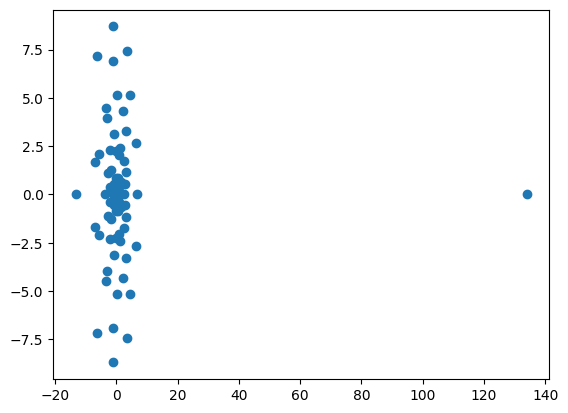

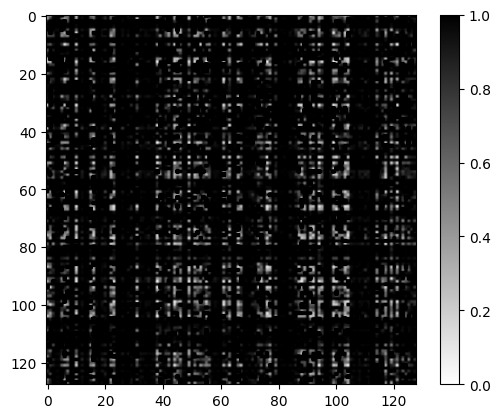

In [33]:
Way = model.org.Way().detach().cpu()


# calculate eigenvalues of Way
eigvals = torch.linalg.eigvals(Way)
# plot the real and complex parts of the eigenvalues

plt.scatter(eigvals.real, eigvals.imag)
# xlim 0, 1
# plt.xlim(0, 5)
plt.show()


vmin = 0
vmax = 1.0
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = colormaps.get_cmap('binary')
# imshow the matrix Wr
plt.imshow(Way, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

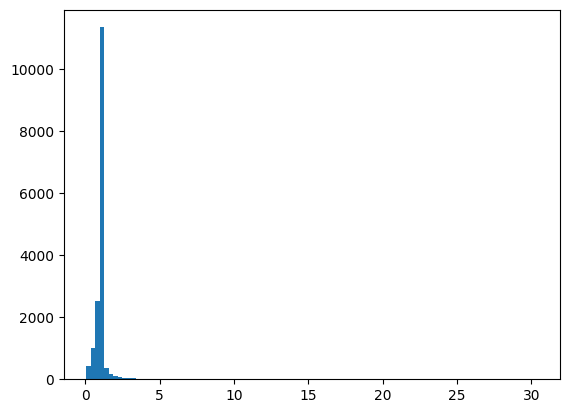

In [34]:
# Remove the largest value in Way
Way = model.org.Way().detach().cpu()
Way = Way.flatten()
W_flat = Way[Way != Way.max()]

plt.hist(W_flat, bins=100)
plt.show()


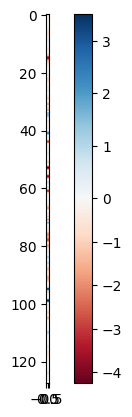

In [35]:
Wzx = model.org.Wzx.detach().cpu()
norm = TwoSlopeNorm(vmin=torch.min(Wzx), vcenter=0.0, vmax=torch.max(Wzx))
cmap = colormaps.get_cmap('RdBu')
# imshow the matrix Wr
# increase figure size
plt.imshow(Wzx, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

13
(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18,
        19, 20, 23, 24, 25, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 47, 48, 49, 51, 52, 54, 55, 56, 57, 58, 59, 61, 63]),)
(tensor([ 1,  4, 12, 16, 20, 21, 24, 27, 32, 38, 42, 48, 50, 51, 59, 60, 62, 63]),)


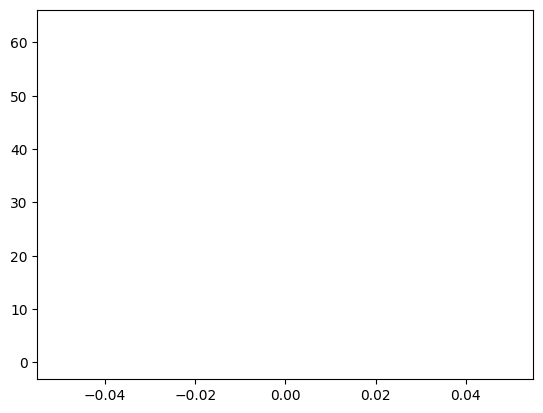

In [19]:
# find how many of Wzx are betwwen 0.1 and -0.1
Wzx = model.org.Wzx.detach().cpu()
Wzx = Wzx.flatten()
W_flat = Wzx[(Wzx > -0.1) & (Wzx < 0.1)]
print(len(W_flat))
indices_new = torch.where((Wzx > -0.5) & (Wzx < 0.5))
print(indices)
print(indices_new)
# plot indices and indices_new
plt.plot(indices)
plt.plot(indices_new)
plt.show()

Now we figure out why is a gowing so much towards the end of the sequence? To test this we calculate the RHS of a and how much does each term contribute.

In [35]:
# give me an example image from the test set
test_loader = dm.test_dataloader()
x, y = next(iter(test_loader))
x = x[0, :, :, :].squeeze()
# x = x.reshape(1, 28, 28)
x = x.reshape(1, 784, 1)
# repeat x along the first dimension
# x = x.repeat(2, 1, 1)
y = model.y0.repeat(x.size(0), 1)
a = model.a0.repeat(x.size(0), 1)
b = model.b0.repeat(x.size(0), 1)

import collections
activation = collections.defaultdict(list)

AttributeError: 'rnn' object has no attribute 'b0'

In [21]:
for i in range(x.size(1)):
    x_t = x[:, i, :]
    activation["x"].append(x_t)

    z = F.linear(x_t, model.org.Wzx, bias=None)
    # make z to be norm 1 only if norm is positive
    # norm_z = torch.norm(z, dim=1, keepdim=True) + 1e-5
    # z = (z / norm_z) * (torch.norm(x_t, dim=1, keepdim=True) / math.sqrt(model.org.input_size))


    activation["z"].append(z)

    y_hat = F.relu(F.linear(y, model.org.Wr(), bias=None))
    activation["y_hat"].append(y_hat)

    B0 = model.org.B0()
    B1 = model.org.B1(x_t)
    activation["B0"].append(B0)
    activation["B1"].append(B1)

    # Update the input gain loss
    # model.input_gain_mse_loss = model.input_gain_mse(B0, B1)

    # Define the time parameters
    dt_y = model.org.Dt_y()
    dt_a = model.org.Dt_a()
    dt_b1 = model.org.Dt_b1()

    # Define the normalization weight matrix
    Way = model.org.Way()
    # Way = torch.ones(128, 128)

    # Integrate the diff. equation by one step and find the activations
    b_new = b + dt_b1 * (- b + B1)
    y_new = y + dt_y * (- y + b * z + (1 - model.org.get_activation_a(a)) * y_hat)
    a_new = a + dt_a * (
        - a
        + model.org.sigma**2 * B0**2
        + F.linear(model.org.get_activation_y(y) * torch.relu(a), Way, bias=None)
        # + F.relu(F.linear(x_t, model.org.Wax, bias=None))
    )
    
    activation["a_constant"].append(model.org.sigma**2 * B0**2)
    activation["a_recurrent"].append(F.linear(model.org.get_activation_y(y) * torch.relu(a), Way, bias=None))
    # activation["a_input"].append(F.relu(F.linear(x_t, model.org.Wax, bias=None)))
    
    activation["a"].append(a)
    activation["y"].append(y)
    activation["b"].append(b)
    
    a = a_new
    y = y_new
    b = b_new

In [22]:
z.shape

torch.Size([1, 256])

In [23]:
norm_z = torch.norm(z, dim=1, keepdim=True)
print(norm_z.shape)

torch.Size([1, 1])


In [24]:
for key in activation.keys():
    # check if dim of activation[key] is 1
    if len(activation[key][0].shape) == 1:
        activation[key] = torch.stack(activation[key], dim=0).detach().cpu()
    else:
        activation[key] = torch.squeeze(torch.stack(activation[key], dim=1).detach().cpu(), 0)

# reshape the input
activation["x"] = activation["x"].reshape(28, 28)

IndexError: list index out of range

In [25]:
print(activation["x"].shape)
print(activation["z"].shape)
print(activation["y_hat"].shape)
print(activation["B0"].shape)
print(activation["B1"].shape)
print(activation["a_constant"].shape)
print(activation["a_recurrent"].shape)
print(activation["a_input"].shape)
print(activation["a"].shape)
print(activation["y"].shape)
print(activation["b"].shape)

torch.Size([786, 1])
torch.Size([786, 256])
torch.Size([786, 256])
torch.Size([786, 256])
torch.Size([786, 256])
torch.Size([785, 256])
torch.Size([785, 256])


AttributeError: 'list' object has no attribute 'shape'

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

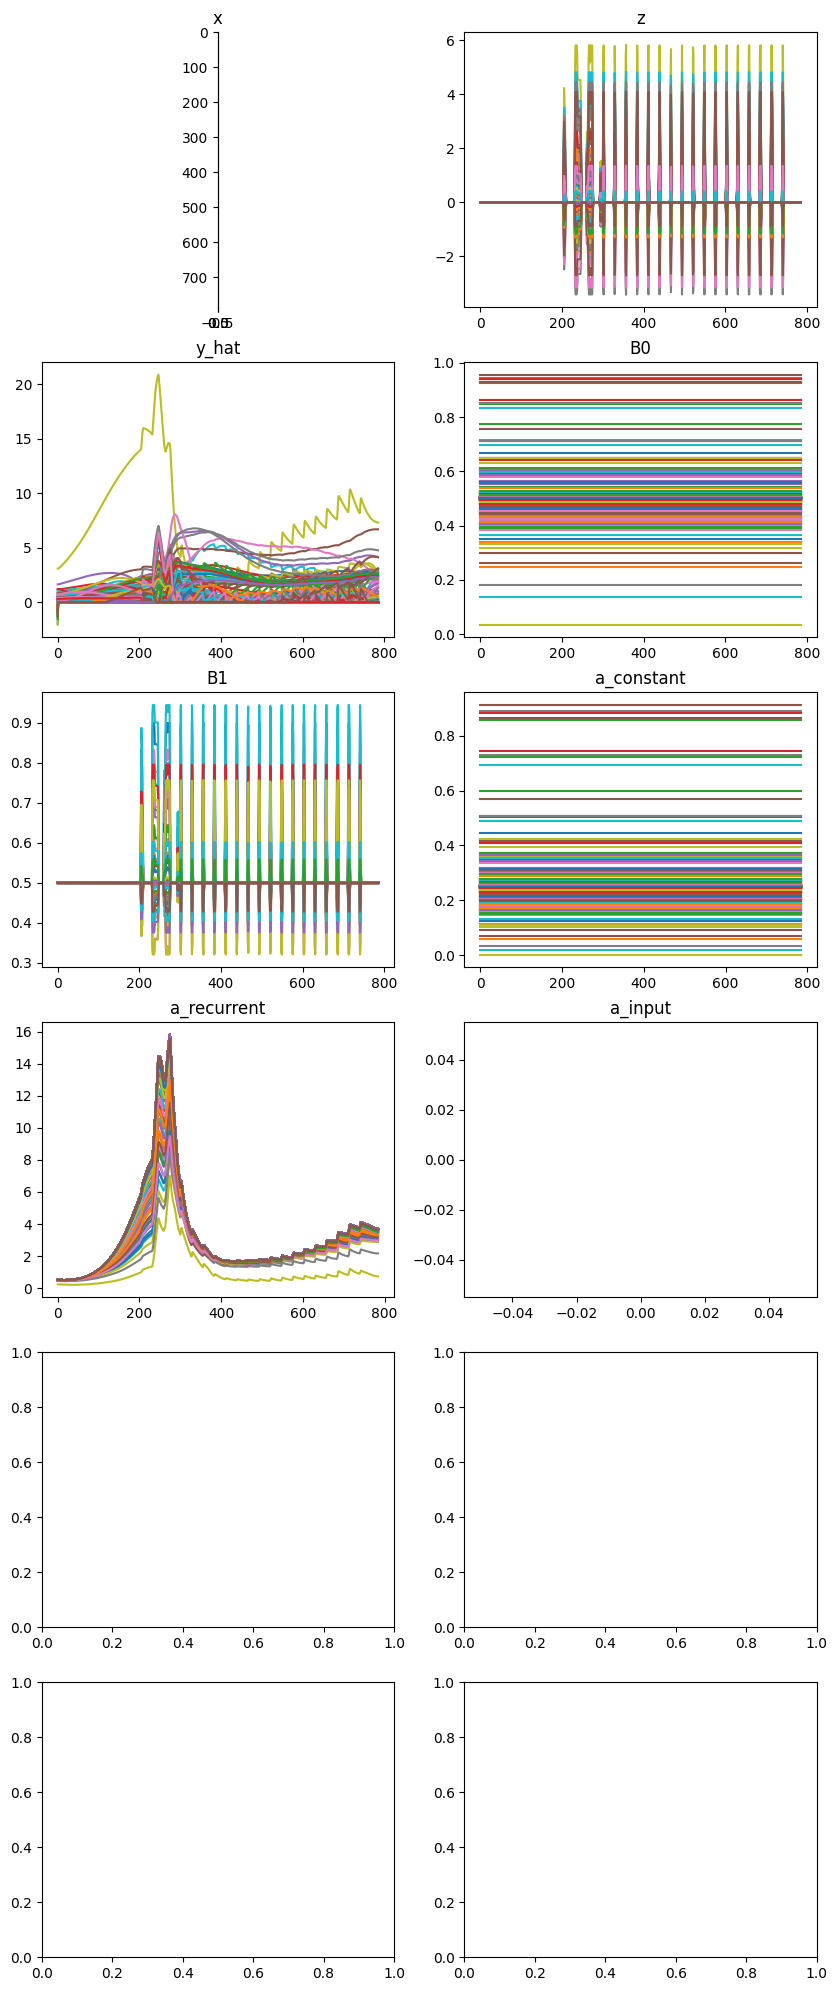

In [26]:
# print all of the activations in a single figure along with titles for different activations
# calculate teh norm of z
norm_z = torch.norm(activation["z"], dim=1)


fig, axs = plt.subplots(6, 2)
fig.set_size_inches(10, 25)
axs[0, 0].imshow(activation["x"])
axs[0, 0].set_title("x")
axs[0, 1].plot(activation["z"])
axs[0, 1].set_title("z")
axs[1, 0].plot(activation["y_hat"])
axs[1, 0].set_title("y_hat")
axs[1, 1].plot(activation["B0"])
axs[1, 1].set_title("B0")
axs[2, 0].plot(activation["B1"])
axs[2, 0].set_title("B1")
axs[2, 1].plot(activation["a_constant"])
axs[2, 1].set_title("a_constant")
axs[3, 0].plot(activation["a_recurrent"])
axs[3, 0].set_title("a_recurrent")
axs[3, 1].plot(activation["a_input"])
axs[3, 1].set_title("a_input")
axs[4, 0].plot(activation["a"])
axs[4, 0].set_title("a")
axs[4, 1].plot(activation["y"])
axs[4, 1].set_title("y")
axs[5, 0].plot(activation["b"])
axs[5, 0].set_title("b")
axs[5, 1].plot(norm_z)
axs[5, 1].set_title("norm_z")
plt.show()


In [53]:
ar = activation["a_recurrent"]
print(ar.shape)

torch.Size([28, 128])


In [54]:
# find the index of max value in ar
max_idx = torch.argmax(ar[-1, :])
print(max_idx)
idx = max_idx
W = model.org.Way().detach().cpu()
# calculate the norm of each row in W
norm_W = torch.norm(W, dim=1)

tensor(8)


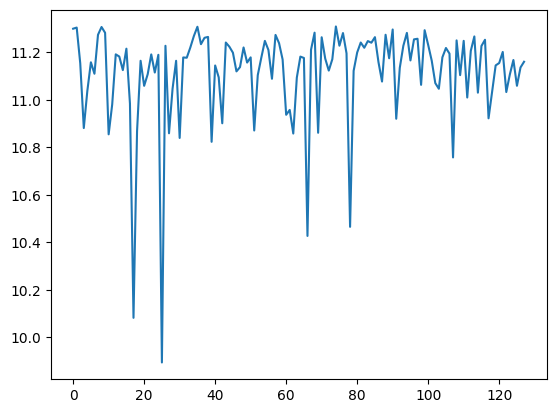

In [55]:
plt.plot(norm_W)
plt.show()

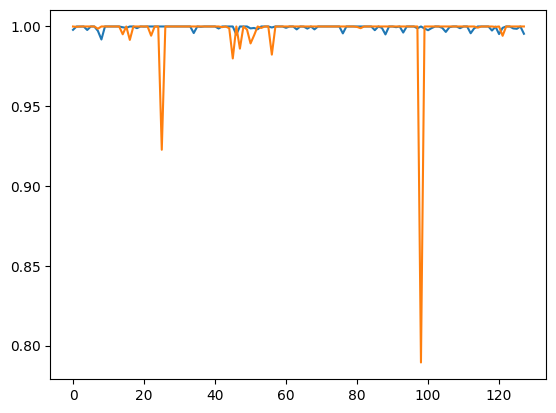

In [56]:
plt.plot(W[idx, :])
plt.plot(W[idx+1, :])
plt.show()